# MNIST Classification test using ordinal encoding and MSE

In [1]:
import numpy

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Let's build and train our model
This is the same architecture except we have an output of 1 dimension with the result as a continuous value. We will apply the MSE loss function to this model.

In [3]:
mse_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])

In [4]:
mse_model.compile(optimizer='adam',
              loss='mse')

In [5]:
mse_model.fit(x_train,
              y_train,
              epochs=20,
              validation_data=(x_test, y_test),
              verbose=0)

## We display some results
### The validation loss tells us how well the training went

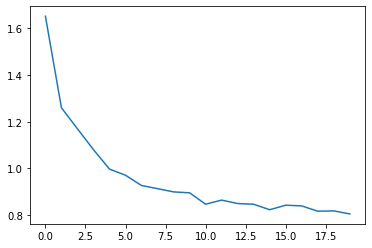

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(mse_model.history.history['val_loss'])

### We need to recover the categories to determine what the accuracy is. First we round the output value then reshape it since the prediction returns an array of arrays of size 1

In [7]:
def accuracy(model, x, y):
    y_pred=model.predict(x)
    # Need to round to nearest integer for ordinal coding
    y_pred=numpy.round(y_pred).reshape(y.shape)
    right=numpy.count_nonzero(y_pred== y)
    return(right/len(y))

### Print the final results in big bold text

In [8]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    accuracy(mse_model, x_test,y_test)*100,
    accuracy(mse_model, x_train,y_train)*100)
display(Markdown(f"# {text}"))

# The accuracy is 59.330% for the test set and 62.492% for the training set

In [9]:
text

'The accuracy is 59.330% for the test set and 62.492% for the training set'

# Not very good